In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 8)
plt.style.use('ggplot')

np.set_printoptions(precision=3)
pd.set_option('precision', 3)
pd.set_option('display.max_columns', None)
sns.set(font_scale=1.2)

# New Section

In [ ]:
import glob
import random 

import cv2 as cv
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, Input, Dropout, Flatten, Dense, MaxPooling2D

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
renders_path = "/content/gdrive/MyDrive/Zeta_Surgical_Project/renders"

In [ ]:
directories = glob.glob(renders_path+"/*")
print(directories)

['/content/gdrive/MyDrive/Zeta_Surgical_Project/renders/subdural', '/content/gdrive/MyDrive/Zeta_Surgical_Project/renders/epidural', '/content/gdrive/MyDrive/Zeta_Surgical_Project/renders/intraparenchymal', '/content/gdrive/MyDrive/Zeta_Surgical_Project/renders/intraventricular', '/content/gdrive/MyDrive/Zeta_Surgical_Project/renders/multi', '/content/gdrive/MyDrive/Zeta_Surgical_Project/renders/subarachnoid', '/content/gdrive/MyDrive/Zeta_Surgical_Project/renders/Image Info.gdoc']


In [ ]:
nrows = len(directories)
ncols = 4
dct = dict()

count_images = 0
for i, folder in enumerate(directories):
    all_files = glob.glob(folder+'/*')
    if len(all_files) > 1:
        onek_images = random.choices(all_files, k=1000)
        subfolder_path = folder.split('/')[-2:]
        hemorrhage_type, window = subfolder_path
        dct[window] = onek_images
        print(f"folder -> {'/'.join(subfolder_path): >40}, {len(all_files):>7} files")
        count_images += len(all_files)
print(f'total number of images: {count_images}')

folder ->                         renders/subdural,   29331 files
folder ->                         renders/epidural,    1694 files
folder ->                 renders/intraparenchymal,   15675 files
folder ->                 renders/intraventricular,    9878 files
folder ->                            renders/multi,   32084 files
folder ->                     renders/subarachnoid,   16471 files
total number of images: 105133


In [ ]:
df = pd.DataFrame.from_dict(dct, orient="columns")
df.head()

,subdural,epidural,intraparenchymal,intraventricular,multi,subarachnoid
0,/content/gdrive/MyDrive/Zeta_Surgical_Project/...,/content/gdrive/MyDrive/Zeta_Surgical_Project/...,/content/gdrive/MyDrive/Zeta_Surgical_Project/...,/content/gdrive/MyDrive/Zeta_Surgical_Project/...,/content/gdrive/MyDrive/Zeta_Surgical_Project/...,/content/gdrive/MyDrive/Zeta_Surgical_Project/...
1,/content/gdrive/MyDrive/Zeta_Surgical_Project/...,/content/gdrive/MyDrive/Zeta_Surgical_Project/...,/content/gdrive/MyDrive/Zeta_Surgical_Project/...,/content/gdrive/MyDrive/Zeta_Surgical_Project/...,/content/gdrive/MyDrive/Zeta_Surgical_Project/...,/content/gdrive/MyDrive/Zeta_Surgical_Project/...
2,/content/gdrive/MyDrive/Zeta_Surgical_Project/...,/content/gdrive/MyDrive/Zeta_Surgical_Project/...,/content/gdrive/MyDrive/Zeta_Surgical_Project/...,/content/gdrive/MyDrive/Zeta_Surgical_Project/...,/content/gdrive/MyDrive/Zeta_Surgical_Project/...,/content/gdrive/MyDrive/Zeta_Surgical_Project/...
3,/content/gdrive/MyDrive/Zeta_Surgical_Project/...,/content/gdrive/MyDrive/Zeta_Surgical_Project/...,/content/gdrive/MyDrive/Zeta_Surgical_Project/...,/content/gdrive/MyDrive/Zeta_Surgical_Project/...,/content/gdrive/MyDrive/Zeta_Surgical_Project/...,/content/gdrive/MyDrive/Zeta_Surgical_Project/...
4,/content/gdrive/MyDrive/Zeta_Surgical_Project/...,/content/gdrive/MyDrive/Zeta_Surgical_Project/...,/content/gdrive/MyDrive/Zeta_Surgical_Project/...,/content/gdrive/MyDrive/Zeta_Surgical_Project/...,/content/gdrive/MyDrive/Zeta_Surgical_Project/...,/content/gdrive/MyDrive/Zeta_Surgical_Project/...


In [ ]:
arr = []
arr = arr + [(path, 'subdural') for path in dct['subdural']]

In [ ]:
arr = []
for key in dct:
    arr += [(path, key) for path in dct[key]]

In [ ]:
random.shuffle(arr)
df2 = pd.DataFrame(data=arr)
df2.head()

,0,1
0,/content/gdrive/MyDrive/Zeta_Surgical_Project/...,intraparenchymal
1,/content/gdrive/MyDrive/Zeta_Surgical_Project/...,epidural
2,/content/gdrive/MyDrive/Zeta_Surgical_Project/...,intraparenchymal
3,/content/gdrive/MyDrive/Zeta_Surgical_Project/...,intraparenchymal
4,/content/gdrive/MyDrive/Zeta_Surgical_Project/...,subdural


In [ ]:
print(df2.shape)

(6000, 2)


,0,1
0,/content/gdrive/MyDrive/Zeta_Surgical_Project/...,intraparenchymal
1,/content/gdrive/MyDrive/Zeta_Surgical_Project/...,epidural
2,/content/gdrive/MyDrive/Zeta_Surgical_Project/...,intraparenchymal
3,/content/gdrive/MyDrive/Zeta_Surgical_Project/...,intraparenchymal
4,/content/gdrive/MyDrive/Zeta_Surgical_Project/...,subdural
5,/content/gdrive/MyDrive/Zeta_Surgical_Project/...,subarachnoid
6,/content/gdrive/MyDrive/Zeta_Surgical_Project/...,intraparenchymal
7,/content/gdrive/MyDrive/Zeta_Surgical_Project/...,subdural
8,/content/gdrive/MyDrive/Zeta_Surgical_Project/...,subdural
9,/content/gdrive/MyDrive/Zeta_Surgical_Project/...,intraparenchymal


IndexError: ignored

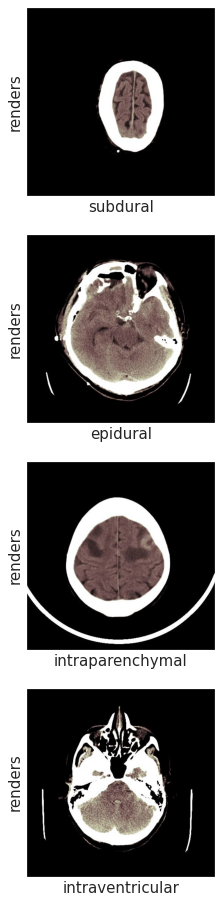

In [ ]:
nrows = 4
ncols = 1
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*4, nrows*4))
for i, folder in enumerate(directories):
    all_files = glob.glob(folder+'/*')
    subfolder_path = folder.split('/')[-2:]
    hemorrhage_type, window = subfolder_path
#         print(f"folder -> {'/'.join(subfolder_path): >40}, {len(all_files):>7} files")
    img_path = random.choice(all_files)
    img_name = '/'.join(img_path.split('/')[:-2]) + '/' + window + '/' + img_path.split('/')[-1]
    ax[i].imshow(cv.imread(img_name), cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    if True:
        ax[i].set_ylabel(hemorrhage_type, fontsize=15)
    if True:
        ax[i].set_xlabel(window, fontsize=15)